In [11]:
#Data wrangling
import numpy as np
import pandas as pd

#seleção e validação de modelos
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV

# Pré-processamento para incluir no pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler

#Pipelines para tratar dados futuos
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

# Modelos
from sklearn.linear_model import LinearRegression

#visualização
import matplotlib.pyplot as plt
from yellowbrick.regressor import residuals_plot, prediction_error
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV,RidgeCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import pickle  # Compatível com Python 3.12


#Manter saída do processamento do sklearn como DataFrame pandas
from sklearn import set_config
set_config(transform_output='pandas')



In [12]:
#definindo funções de metricas para analisar os modelos mais a frente
def get_metrics(y_true,y_pred):
    dict_metrics = {
        'R2': metrics.r2_score(y_true,y_pred),
        'MAE': metrics.mean_absolute_error(y_true,y_pred),
        'MAPE': metrics.mean_absolute_percentage_error(y_true,y_pred),
        'RMSE':np.sqrt(metrics.mean_squared_error(y_true,y_pred)),
    }
    return dict_metrics

In [13]:
#Tabela que vamos trabalhar .
df = pd.read_csv(r'C:\Users\Shiry\OneDrive\Área de Trabalho\Pipelines - Material de apoio\teste_plano_saude\Pipelines (2)\Pipelines\data\insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
#verificando  os valores estatisco descritivo dos dados
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# verificando as informações de cada coluna e o tipo de dados  , se esxistem nulos ou não 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
#apenas separando em colunas categoricas e numerica e o alvo
NUMERICAL_FEATURES = ['bmi', 'age', 'children']
CATEGORICAL_FEATURES = ['sex', 'smoker', 'region']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

<Axes: xlabel='age', ylabel='charges'>

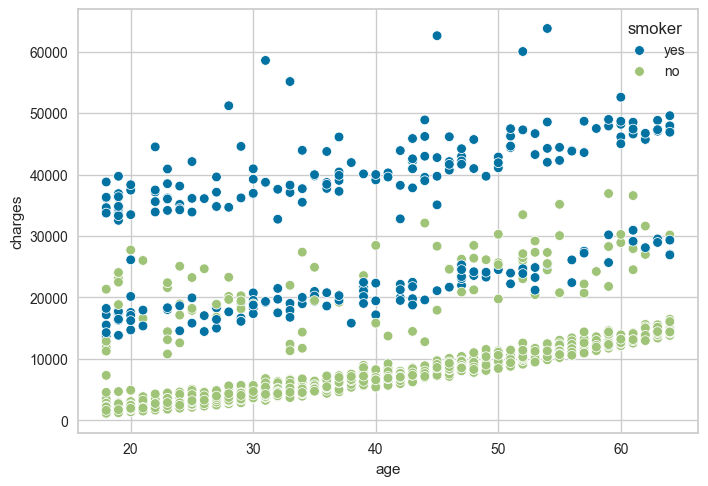

In [17]:
#verificando distribuição de age(idade) por charges
#serve para descrever se o a idade altera o valor de charges se o paciente fdor fumante ou não
sns.scatterplot(x='age',y='charges',data=df, hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

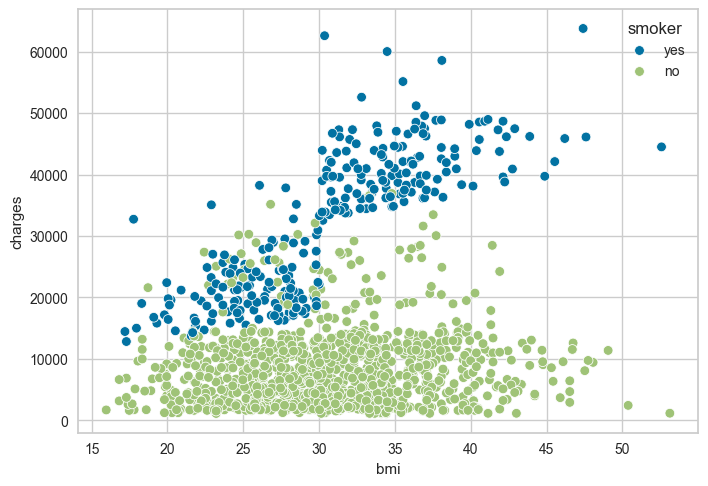

In [18]:
# verificando a distribuição de  bmi sobre charges .
#serve para descrever se o indice de bmi altera o valor de charges  se o paciente for fumante ou não
sns.scatterplot(x='bmi',
                y='charges',data=df, hue='smoker')

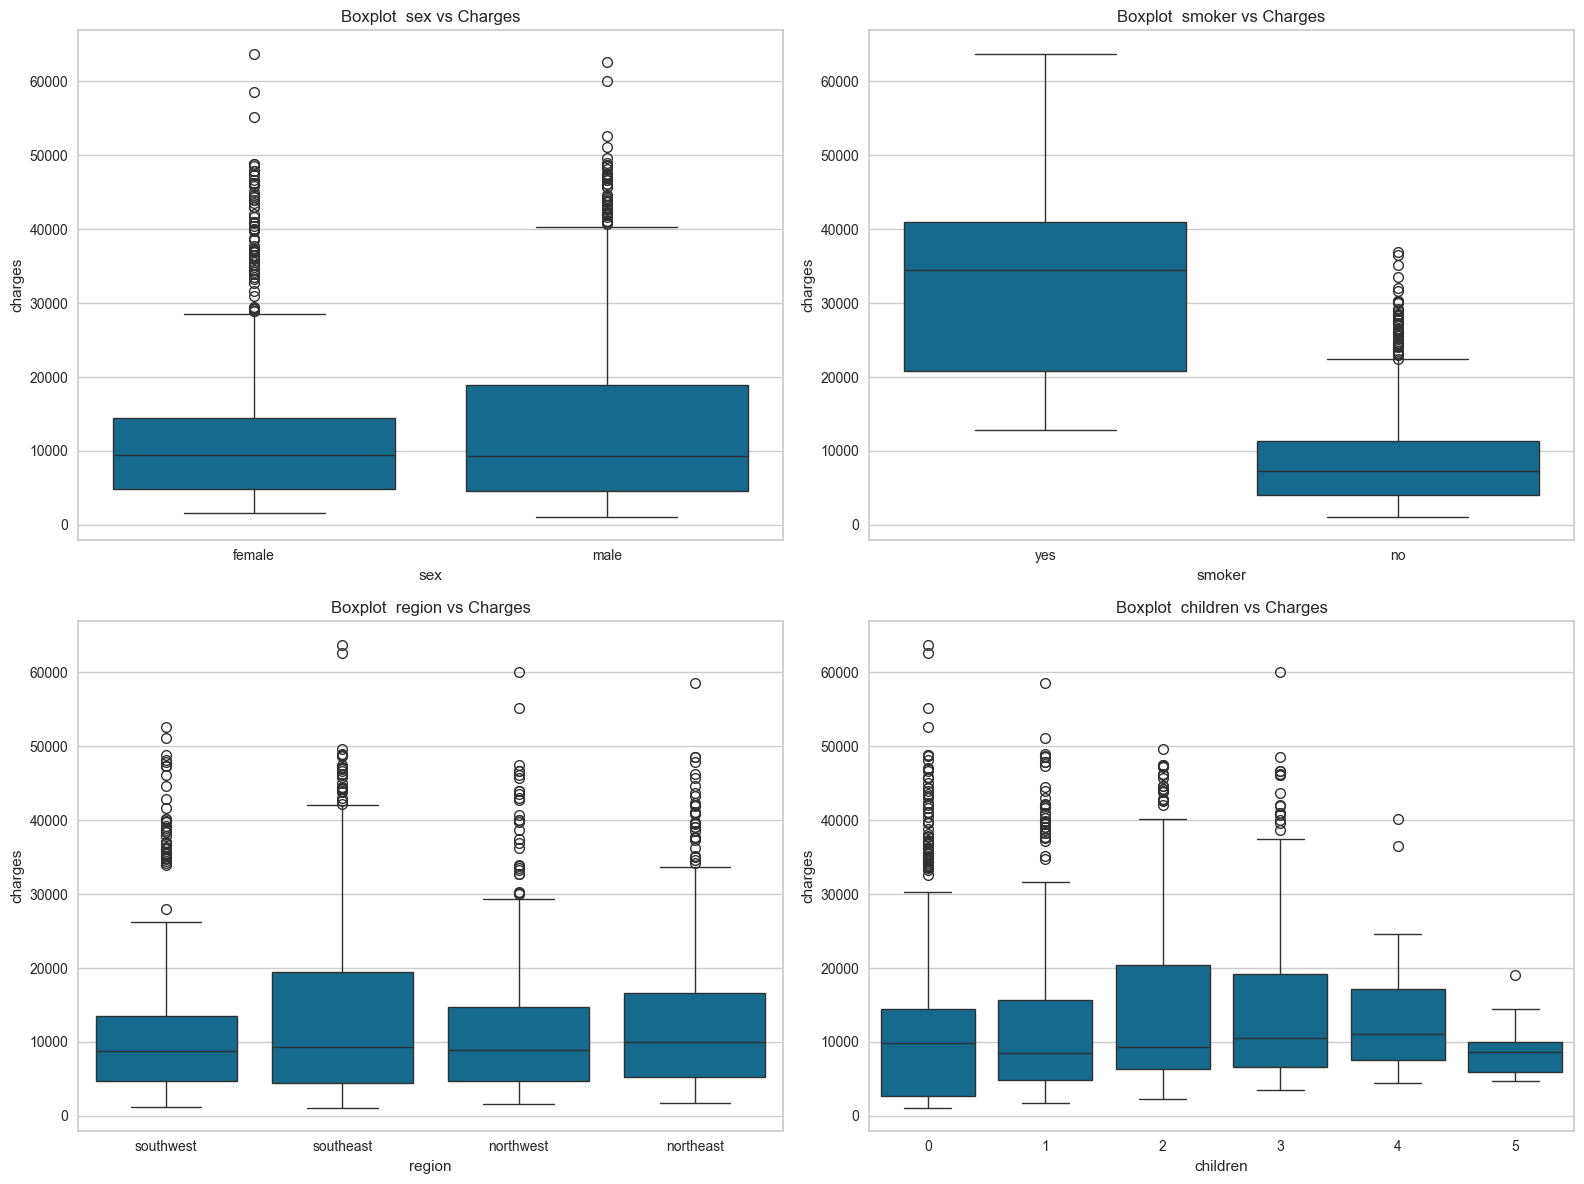

In [19]:
#graficos boxplot de cada coluna e verifcando os outliers
cat_plot_cols = CATEGORICAL_FEATURES = ['sex', 'smoker', 'region','children']

f,axes = plt.subplots(nrows= 2, ncols=2,figsize=(16,12))
for col,ax in zip(cat_plot_cols,axes.flatten()):
    sns.boxplot(x=col,y='charges',data=df,ax=ax)
    ax.set_title(f'Boxplot  {col} vs Charges')
# Ajustando layout
plt.tight_layout()
plt.show()

In [20]:
#separando modelo em treino e teste
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2023)

In [21]:
# Definição das colunas
NUMERICAL_FEATURES = ['bmi', 'age', 'children']
CATEGORICAL_FEATURES = [ 'smoker']

# Transformadores para variáveis numéricas e categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(
    drop='if_binary', handle_unknown='ignore', sparse_output=False
)

# Definir o ColumnTransformer com nomes
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, NUMERICAL_FEATURES),  # Nome: 'num'
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)  # Nome: 'cat'
])

preprocessor.fit_transform(X_train)


,num__bmi,num__age,num__children,cat__smoker_yes
632,0.526500,0.239130,0.0,0.0
895,0.754372,0.934783,0.0,0.0
1173,0.357815,0.434783,0.4,0.0
1131,0.805488,0.195652,0.4,0.0
363,0.280872,0.065217,0.2,0.0
...,...,...,...,...
884,0.288808,0.152174,0.8,0.0
515,0.531073,0.869565,0.0,0.0
695,0.651735,0.173913,0.0,0.0
454,0.822437,0.304348,0.4,0.0


In [22]:
#treino de modelo em pipeline -  Dummy regressor - 
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model'
     ,DummyRegressor())
    
])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bmi', 'age', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker'])])),
                ('model', DummyRegressor())])

In [23]:
#model_pipeline.named_steps


In [24]:
#testando modelos e paramentros para escolher o melhor modelo
params = {
    'model':[
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        RandomForestRegressor(random_state=2024),
        GradientBoostingRegressor(random_state=2024)]
    
}


grid_model = GridSearchCV(model_pipeline,params,cv=5,scoring='r2',verbose=1)
grid_model.fit(X_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['bmi',
                                                                          'age',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['smoker'])])),
                                       ('model', DummyRegressor())]),
             param_grid={'model': [DummyRegressor(), LinearRegression(),
                                   LassoCV(), RidgeCV(),
                                   RandomForestRegressor(random_state=2024),
                                   GradientBoostingRegressor(random_state=2024)]},
             scoring='r2', verbose=1)

In [25]:
#verificando melhor modelo com os melhores parametros
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bmi', 'age', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker'])])),
                ('model', GradientBoostingRegressor(random_state=2024))])

In [26]:
#tabela para verificar diferença entre modelos 
df_cv_results = pd.DataFrame(grid_model.cv_results_).sort_values('rank_test_score')

# Selecionando colunas que não contêm 'split' ou 'time'
filtered_columns = ~df_cv_results.columns.str.contains('split|time')
df_cv_results_filtered = df_cv_results.loc[:, filtered_columns]

# Exibindo o resultado
df_cv_results_filtered

,param_model,params,mean_test_score,std_test_score,rank_test_score
5,GradientBoostingRegressor(random_state=2024),{'model': GradientBoostingRegressor(random_sta...,0.845807,0.024212,1
4,RandomForestRegressor(random_state=2024),{'model': RandomForestRegressor(random_state=2...,0.815540,0.038520,2
3,RidgeCV(),{'model': RidgeCV()},0.741229,0.013757,3
1,LinearRegression(),{'model': LinearRegression()},0.741219,0.013792,4
2,LassoCV(),{'model': LassoCV()},0.741210,0.013741,5
0,DummyRegressor(),{'model': DummyRegressor()},-0.003390,0.003738,6


In [27]:
#TUNAGEM
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model'
     ,GradientBoostingRegressor(random_state=2023))
    ])

params={
    'model__learning_rate':[0.1,0.01],
    'model__max_depth':[3,4,5],
    'model__n_estimators':[300,400,500],
    'model__subsample':[1.,.8],
}

grid_model = GridSearchCV(model_pipeline,params,cv=5,scoring='r2',n_jobs=1, verbose=1)
grid_model.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['bmi',
                                                                          'age',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['smoker'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2023))]),
             n_jobs=1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

In [28]:
#tabela para verificar diferença entre modelos 
df_cv_results = pd.DataFrame(grid_model.cv_results_).sort_values('rank_test_score')

# Selecionando colunas que não contêm 'split' ou 'time'
filtered_columns = ~df_cv_results.columns.str.contains('split|time')
df_cv_results_filtered = df_cv_results.loc[:, filtered_columns]

# Exibindo o resultado
df_cv_results_filtered


,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score,rank_test_score
20,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856369,0.020367,1
21,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855952,0.019788,2
22,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855667,0.021544,3
23,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855124,0.020332,4
19,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.854321,0.018700,5
18,0.01,3,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.854032,0.018889,6
27,0.01,4,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.851053,0.023652,7
26,0.01,4,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.850949,0.024515,8
25,0.01,4,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.850835,0.022500,9
24,0.01,4,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.849937,0.022387,10


In [29]:
model_pipeline = grid_model.best_estimator_

In [30]:
y_pred = model_pipeline.predict(X_test)
get_metrics( y_test,y_pred)

{'R2': 0.8664659032642603,
 'MAE': 2568.0246135359725,
 'MAPE': 0.29353937225200916,
 'RMSE': 4486.32164419}

<Axes: xlabel='charges'>

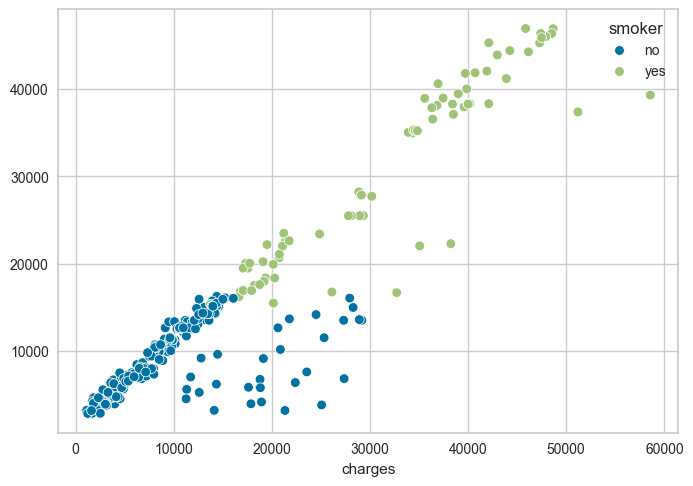

In [31]:
sns.scatterplot(x=y_test,y=y_pred,hue=X_test.smoker)

<Axes: >

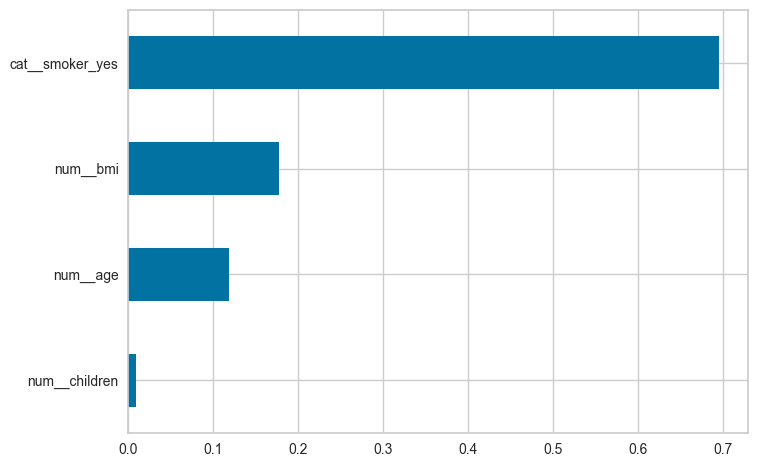

In [32]:
Importances = pd.Series(
    data=model_pipeline.named_steps['model'].feature_importances_,
    index=model_pipeline.named_steps['preprocessor'].get_feature_names_out()
)


Importances.sort_values().plot.barh()

In [34]:
# Defina o caminho correto para o arquivo
file_path = r'C:\Users\Shiry\OneDrive\Área de Trabalho\Pipelines - Material de apoio\teste_plano_saude\Pipelines (2)\Pipelines\data\models\model_pipeline.pkl'

# Abrindo o arquivo no modo de escrita binária
with open(file_path, 'wb') as file_model:
    # Serializando o modelo
    pickle.dump(model_pipeline, file_model)